# Random Forest

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils import class_weight
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import pickle
from src.train_test import *
from src.preprocessor import *
from src.assess import *
from src.pklreader import *

In [26]:
# Read, split, and transform the data

data = pd.read_csv('smog_data_cleaned.csv')
X_train, X_test, y_train, y_test = split(data)
preprocessor = preprocesser()

In [27]:
# Make the pipeline of the random forest, fit the model

pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, n_jobs=-1))
pipe_weighted = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, n_jobs=-1, class_weight='balanced'))

pipe_rf.fit(X_train, y_train);
pipe_weighted.fit(X_train, y_train);

In [28]:
# Assessments

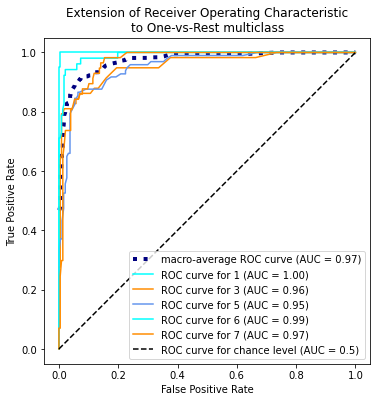

In [29]:
random_forest_cv = cv_predict_interval(pipe_rf, X_train, y_train)
mean_cv_rf = get_mean_cv(random_forest_cv)
result_rf = mean_std_cross_val_scores(pipe_rf, X_train, y_train,return_train_score=True,scoring='accuracy')
misClassificationRate_rf = calc_misclass_rate_pred_interval(pipe_rf.predict_proba(X_test),y_test)
test_score_rf = pipe_rf.score(X_test, y_test)
auc_rf = auc_drawer(pipe_rf, X_test, y_train,y_test)
auc_rf = list(auc_rf.values())
roc_rf = roc_auc_score(y_test, pipe_rf.predict_proba(X_test), multi_class='ovr')

cm_rf = confusion_matrix(y_test, pipe_rf.predict(X_test))
cm_rf = cm_rf.diagonal()/cm_rf.sum(axis=1)
cm_rf = cm_rf.tolist()

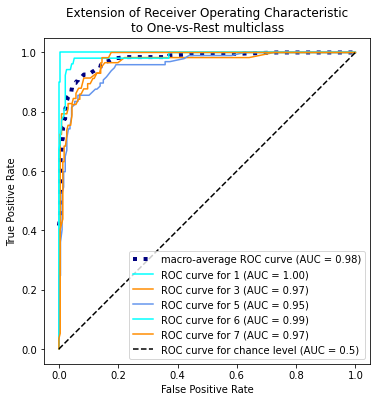

In [30]:
weighted_random_forest_cv = cv_predict_interval(pipe_weighted, X_train, y_train)
mean_cv_wrf = get_mean_cv(weighted_random_forest_cv)
result_wrf = mean_std_cross_val_scores(pipe_weighted, X_train, y_train,return_train_score=True,scoring='accuracy')
misClassificationRate_wrf = calc_misclass_rate_pred_interval(pipe_weighted.predict_proba(X_test), y_test)
test_score_wrf = pipe_weighted.score(X_test, y_test)
auc_wrf = auc_drawer(pipe_weighted, X_test, y_train,y_test)
auc_wrf = list(auc_wrf.values())
roc_wrf = roc_auc_score(y_test, pipe_weighted.predict_proba(X_test), multi_class='ovr')

cm_wrf = confusion_matrix(y_test, pipe_weighted.predict(X_test))
cm_wrf = cm_wrf.diagonal()/cm_wrf.sum(axis=1)
cm_wrf = cm_wrf.tolist()

In [31]:
cv_result_tb_rf = cv_result_table(random_forest_cv, mean_cv_rf, result_rf['test_score'],result_rf['test_score'])
test_result_tb_rf = get_test_result_table(misClassificationRate_rf, cm_rf, test_score_rf, auc_rf, roc_rf).round(4)

print(cv_result_tb_rf)
print(test_result_tb_rf)

                    1      2      3      4      5               mean
pred50          0.105  0.135  0.106  0.189  0.129              0.133
pred80           0.03  0.053  0.023   0.03  0.038              0.035
Train_Accuracy      -      -      -      -      -  0.811 (+/- 0.024)
Test_Accuracy       -      -      -      -      -  0.811 (+/- 0.024)
                 1      3      5      6      7  Overall
class_pred50  0.00  0.190  0.134  0.058  0.088    0.094
class_pred80  0.00  0.121  0.031  0.019  0.018    0.038
Accuracy      0.95  0.793  0.845  0.923  0.877    0.863
AUC           1.00  0.956  0.952  0.990  0.968    0.973


In [32]:
cv_result_tb_wrf = cv_result_table(weighted_random_forest_cv, mean_cv_wrf, result_wrf['test_score'],result_wrf['test_score'])
test_result_tb_wrf = get_test_result_table(misClassificationRate_wrf, cm_wrf, test_score_wrf, auc_wrf, roc_wrf).round(4)
print(cv_result_tb_wrf)
print(test_result_tb_wrf)

                    1      2      3      4      5               mean
pred50          0.098   0.15  0.129  0.174  0.129              0.136
pred80          0.015  0.045  0.046  0.046  0.023              0.035
Train_Accuracy      -      -      -      -      -  0.820 (+/- 0.035)
Test_Accuracy       -      -      -      -      -  0.820 (+/- 0.035)
                 1      3      5      6      7  Overall
class_pred50  0.05  0.190  0.103  0.077  0.105    0.105
class_pred80  0.00  0.069  0.021  0.019  0.018    0.025
Accuracy      0.95  0.741  0.876  0.885  0.877    0.856
AUC           1.00  0.968  0.954  0.987  0.970    0.976


In [33]:
table = categoryPredMatrix(pipe_weighted.predict_proba(X_test),y_test)
display(table.get('table50'))
display(table.get('table80'))

pred50,1,13,3,35,5,53,56,57,6,65,67,7,73,75,76
Smog Rating,,,,,,,,,,,,,,,
1,18,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,42,1,4,2,1,0,0,0,0,4,1,2,0
5,0,0,2,0,81,1,0,3,2,0,0,6,0,2,0
6,0,0,0,0,4,0,1,0,42,1,3,0,0,0,1
7,0,0,0,0,2,0,1,1,3,0,0,46,0,4,0


pred80,1,13,136,15,153,3,31,315,35,351,...,675,7,73,735,75,753,756,76,763,765
Smog Rating,,,,,,,,,,,,,,,,,,,,,
1,9,5,1,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,26,1,1,10,1,...,0,1,3,0,0,2,1,0,0,0
5,0,0,0,0,0,1,0,0,1,0,...,0,0,1,1,4,2,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,2,23,2,0,15,0,2,7,1,0


In [34]:
with open('workspace_file/03a_1_rf_cv.pkl', 'wb') as f:
    pickle.dump(cv_result_tb_rf, f)
    
with open('workspace_file/03a_2_rf_test.pkl', 'wb') as f:
    pickle.dump(test_result_tb_rf, f)
    
with open('workspace_file/03a_3_wrf_cv.pkl', 'wb') as f:
    pickle.dump(cv_result_tb_wrf, f)
    
with open('workspace_file/03a_4_wrf_test.pkl', 'wb') as f:
    pickle.dump(test_result_tb_wrf, f)   

In [35]:
with open('workspace_file/03a_5_rfmodel.pkl', 'wb') as f:
    pickle.dump(pipe_rf, f)
    
with open('workspace_file/03a_6_wrfmodel.pkl', 'wb') as f:
    pickle.dump(pipe_weighted, f)